Firstly, we are importing pandas, which we use to load and handle the data. We are also using numpy, and matplotlib and seaborn for visualizations.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('data/USDA_Food_Database.csv', encoding = 'iso-8859-1', sep=';')

In [36]:
data.head()

,No,Keyword,Name,Water_(g),Energy_(kcal),Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_(µg),Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
0,1001,ANIMAL FAT,"BUTTER,WITH SALT","15,87",717,"0,85","81,11","2,11","0,06",0,...,0.0,0.0,0.0,"2,32",0,7,"51,368","21,021","3,043",215.0
1,1002,ANIMAL FAT,"BUTTER,WHIPPED,W/ SALT","16,72",718,"0,49","78,3","1,62","2,87",0,...,6.0,0.0,13.0,"1,37",0,"4,6","45,39","19,874","3,331",225.0
2,1003,OIL,"BUTTER OIL,ANHYDROUS","0,24",876,"0,28","99,48",0,0,0,...,0.0,0.0,0.0,"2,8",0,"8,6","61,924","28,732","3,694",256.0
3,1004,CHEESE,"CHEESE,BLUE","42,41",353,"21,4","28,74","5,11","2,34",0,...,0.0,0.0,0.0,"0,25","0,5","2,4","18,669","7,778","0,8",75.0
4,1005,CHEESE,"CHEESE,BRICK","41,11",371,"23,24","29,68","3,18","2,79",0,...,0.0,0.0,0.0,"0,26","0,5","2,5","18,764","8,598","0,784",94.0


We are only interested the content of magnesium and calcium in each food, each food's name and its category (Keyword). We can see that there are 36 different categories.
We can also observe, that the content information for some foods is missing.

In [37]:
data[['Keyword', 'Name', 'Magnesium_(mg)', 'Calcium_(mg)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 4 columns):
Keyword           8790 non-null object
Name              8790 non-null object
Magnesium_(mg)    8051 non-null float64
Calcium_(mg)      8442 non-null float64
dtypes: float64(2), object(2)
memory usage: 274.8+ KB


In [38]:
data[['Keyword']].nunique()

Keyword    36
dtype: int64

In the next step, we will be aggregating values per category. Since we are only interested in magnesium and calcium contents of each food, we first subset these values and create a new dataframe.

In [39]:
df = data[['Keyword', 'Magnesium_(mg)', 'Calcium_(mg)']]
df.head()

,Keyword,Magnesium_(mg),Calcium_(mg)
0,ANIMAL FAT,2.0,24.0
1,ANIMAL FAT,1.0,23.0
2,OIL,0.0,4.0
3,CHEESE,23.0,528.0
4,CHEESE,24.0,674.0


In [40]:
df_agg = df.groupby(['Keyword']) #['Magnesium_(mg)', 'Calcium_(mg)']
#df1['idxmax'] = df1['idxmax'].map(df['D'])
#df1 = df1.rename(columns={'idxmax':'D','sum':'C'})

Instead of summing up the values for each category, we need to find the mean value of each category.
The resulting dataframe is saved to a csv.

In [41]:
new_df = df_agg.describe()
df = pd.DataFrame(data=new_df)
mag = df.iloc[:, 1:2]
cal = df.iloc[:, 9:10]
finaldf = pd.concat([mag, cal], axis=1)
finaldf.to_csv('output/mag_cal_per_category.csv')

We use this newly created dataset to proceed further with the clustering task.

## Clustering:

In [42]:
X = finaldf

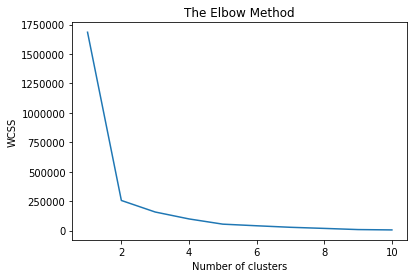

In [43]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [45]:
y_kmeans

array([0, 0, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 4, 1, 2, 0, 0,
       0, 0, 0, 2, 3, 2, 0, 0, 0, 2, 0, 0, 1, 2], dtype=int32)

In [46]:
kmeans.cluster_centers_

array([[ 18.97147464,  29.70526691],
       [ 81.29891304, 816.56521739],
       [ 56.43839945, 108.20948591],
       [102.31344443, 574.96356275],
       [ 26.63010204, 279.30980392]])

In [47]:
kmeans.labels_

array([0, 0, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 4, 1, 2, 0, 0,
       0, 0, 0, 2, 3, 2, 0, 0, 0, 2, 0, 0, 1, 2], dtype=int32)

In [48]:
X = X.values

At first, we split the categories into 5 clusters and visualize the centroid of each cluster. The first cluster seems to have relatively low content of each calcium and magnesium. The fifth cluster, in comparison with the first one, is higher in calcium, whereas the magnesium values are relatively comparable. Fourth cluster is high in calcium, but contains categories that are both very high and low in magnesium. Therefore, this cluster is not quite useful for us, since we are interested in food that are high in one mineral, but simultaneously low in another.

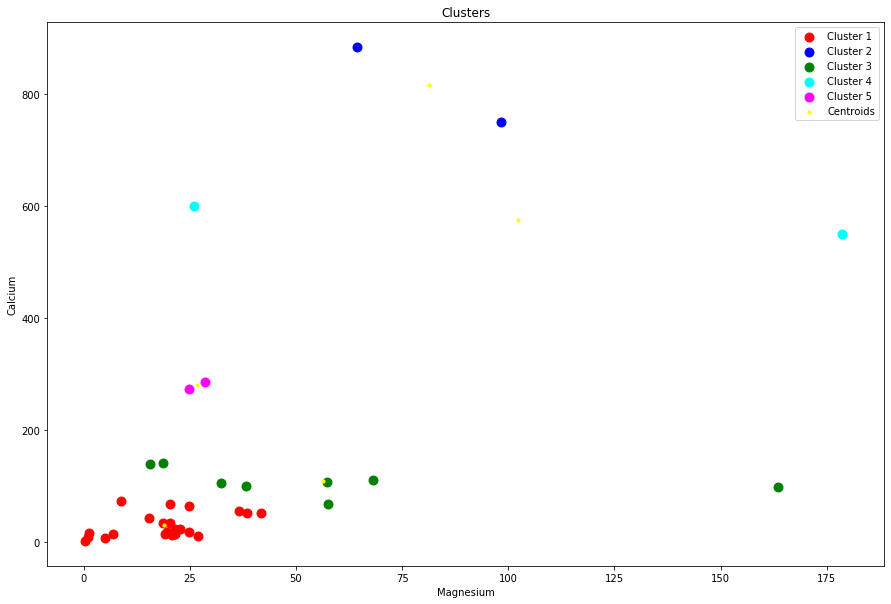

In [49]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 80, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Magnesium')
plt.ylabel('Calcium')
plt.legend()
plt.show()

From our data we can see one category, that seems to have very high content of both minerals. This category is spices. We can consider is as an outlier. Also, although this category does have such hugh contents of these minerals, the usual consumption amount is very low compared to other categories, such as meat, cheese or vegetables. For this reason, we choose to cluster the categories in 3 clusters (The spice category is a cluster on its own - to avoid having to delete this category)

In [50]:
# Fitting K-Means to the dataset
kmeans2c = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2c = kmeans2c.fit_predict(X)

In the visualization below, we can observe the two other clusters (except for the "spice" category). The cluster shown in blue, seems to have much higher values of calcium, but the magnesium values once again seem to stretch over the whole spectrum.

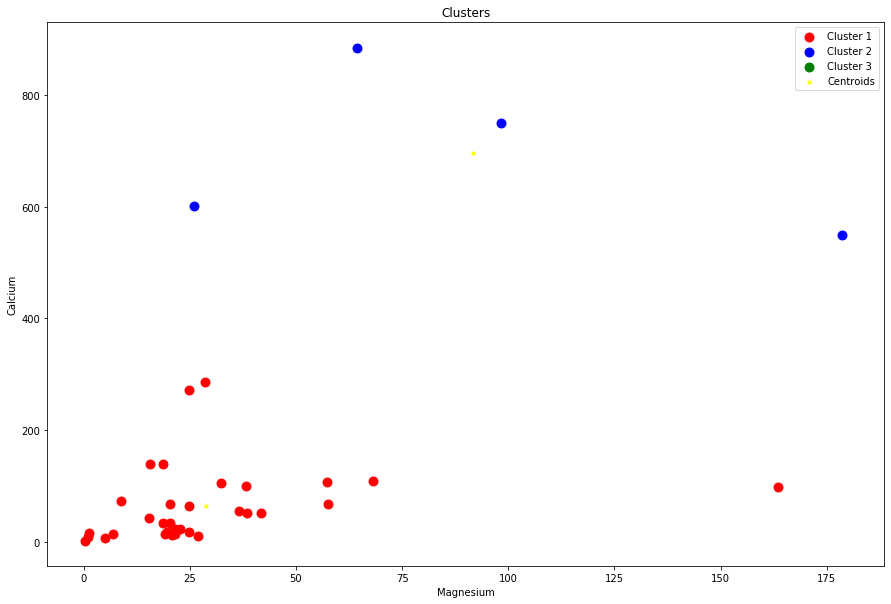

In [51]:
# Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[y_kmeans2c == 0, 0], X[y_kmeans2c == 0, 1], s = 80, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans2c == 1, 0], X[y_kmeans2c == 1, 1], s = 80, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans2c == 2, 0], X[y_kmeans2c == 2, 1], s = 80, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans2c.cluster_centers_[:, 0], kmeans2c.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Magnesium')
plt.ylabel('Calcium')
plt.legend()
plt.show()

In the next part, we cluster all the foods (not aggregated into categories)

In [52]:
df2 = data[['Keyword', 'Magnesium_(mg)', 'Calcium_(mg)']]
df2 = df2.dropna()
df2.describe()
X2 = df2.iloc[:, 1:3]

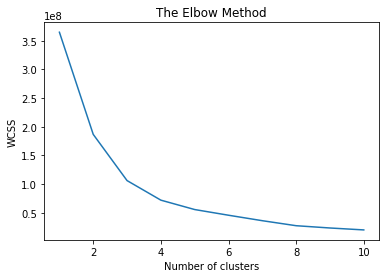

In [53]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# Fitting K-Means to the dataset
kmeans_all = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans_all = kmeans_all.fit_predict(X2)

In [55]:
y_kmeans_all

array([0, 0, 0, ..., 0, 5, 4], dtype=int32)

In [56]:
X2 = X2.values

The clustering of foods not aggregated by categories seems to be more valuable in our case. For example, foods in cluster 8 are quite high in calcium, but low in magnesium. Consuming these foods together should then lead to better absorption of the minerals. They should not be consumed with the foods in cluster 6, since these are very low in calcium, but high in magnesium. They should be eaten on their own, or in combination with foods from cluster1 or 5, since these are as well very low in calcium, but have a slightly higher magnesium content.

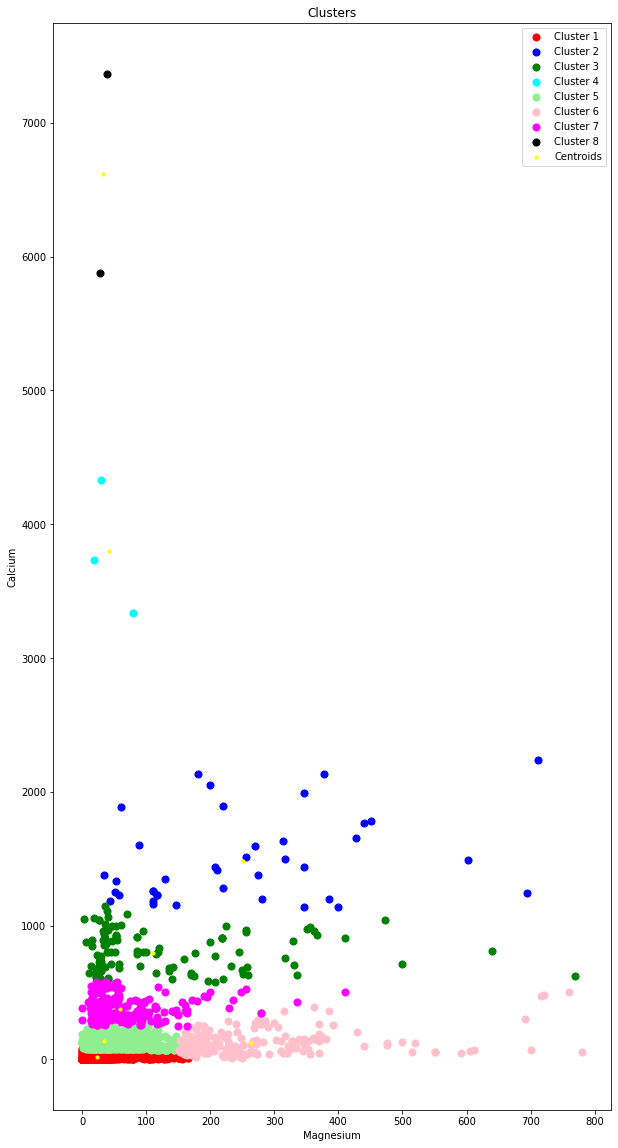

In [57]:
# Visualising the clusters
plt.figure(figsize=(10, 20))
plt.scatter(X2[y_kmeans_all == 0, 0], X2[y_kmeans_all == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans_all == 1, 0], X2[y_kmeans_all == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans_all == 2, 0], X2[y_kmeans_all == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans_all == 3, 0], X2[y_kmeans_all == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y_kmeans_all == 4, 0], X2[y_kmeans_all == 4, 1], s = 50, c = 'lightgreen', label = 'Cluster 5')
plt.scatter(X2[y_kmeans_all == 5, 0], X2[y_kmeans_all == 5, 1], s = 50, c = 'pink', label = 'Cluster 6')
plt.scatter(X2[y_kmeans_all == 6, 0], X2[y_kmeans_all == 6, 1], s = 50, c = 'magenta', label = 'Cluster 7')
plt.scatter(X2[y_kmeans_all == 7, 0], X2[y_kmeans_all == 7, 1], s = 50, c = 'black', label = 'Cluster 8')
plt.scatter(kmeans_all.cluster_centers_[:, 0], kmeans_all.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Magnesium')
plt.ylabel('Calcium')
plt.legend()
plt.show()

At this point, we create a new column in the data by assigning to each food its respective cluster number. This data is saved to a csv as well.

In [59]:
cluster_number = y_kmeans_all.tolist()

In [60]:
df2['cluster'] = y_kmeans_all
df2 = df2.join(data['Name'])
df2.to_csv('output/clustered_food.csv')

#### In the following section, we examine correlation between categories and we compare various categories to each other.

## Correlation

In [26]:
data_correlation = data.replace(',', '.', regex=True) #replacing all commas used as delimiters to points (e.g. 3,14 is now 3.14)

In [27]:
data_correlation = data_correlation.iloc[:, 3:] #subsetting the attributes for which we want to find correlations with other attributes
data_correlation = data_correlation.astype(float) #converting values to floats
data_correlation = data_correlation.fillna(0) #replacing missing values with zeros

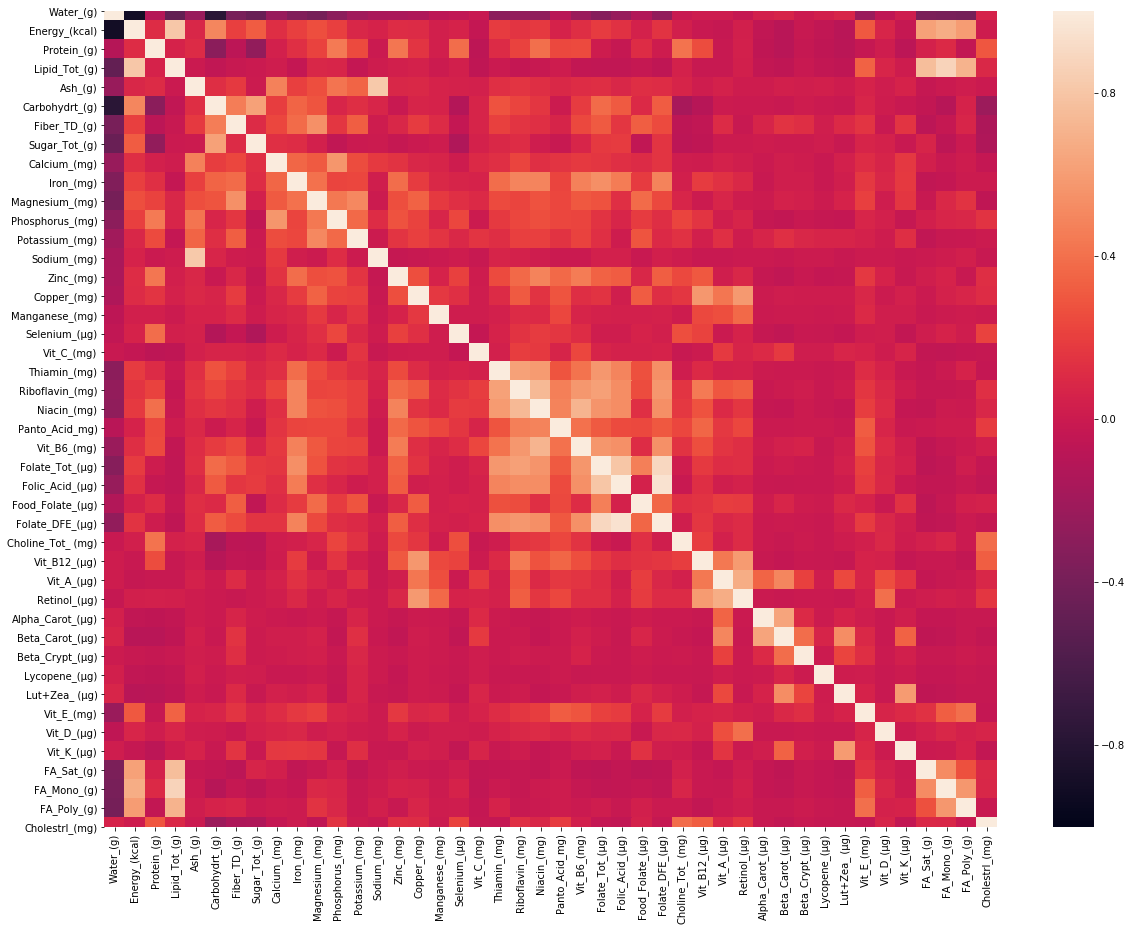

In [28]:
corr_matrix = data_correlation.corr() #creating the correlation matrix
corr_matrix.to_csv('output/corr_matrix.csv')
plt.figure(figsize=(20,15))
ax = sns.heatmap(corr_matrix, vmin = -1, vmax = 1) # plotting a correlation heatmap

### Comparison

Now we prepare our data to be able to compare various categories. We group the rows by the category they belong to. This data is saved to a csv, so it can be used later to work with the categories more easily.

For each category, we use the mean of each attribute. (E.g. the mean content of water (in grams per 100g) in vegetables)
The categories we are comparing are fruits vs vegetables, animal fat vs vegetable fat, and lastly processed food vs vegetables.

In [29]:
keywords = data['Keyword']
data_correlation['Keyword'] = keywords
df_agg = data_correlation.groupby(['Keyword']) #aggregating data per category

In [30]:
categories_descriptive = df_agg.describe() #obtaining descriptive statistics of each category for all attributes
categories_descriptive.to_csv('output/categories_descriptive.csv')
categories_descriptive

Water_(g)                                                \
                       count       mean        std    min      25%     50%   
Keyword                                                                      
ALCOHOLIC BEVERAGE      70.0  78.649143  14.569520  28.30  70.9925  86.195   
ANIMAL FAT              11.0  12.420909  16.718254   0.00   0.2000   0.200   
BABYFOOD               365.0  67.844329  32.679495   1.00  75.4000  82.900   
BEEF                   971.0  62.496148   8.787125   4.00  57.9100  62.720   
BEVERAGES              532.0  77.082876  28.634948   0.13  79.5975  87.300   
BREAD                  189.0  34.171111  10.795659   3.09  31.0000  34.400   
CHEESE                 104.0  50.477596  15.555659   8.60  40.9950  48.200   
CHICKEN                240.0  61.021458  14.011528   1.87  56.4400  63.950   
CREAM                   23.0  63.372609  27.202505   1.52  59.5700  74.510   
DUCK                    13.0  66.074615   8.790465  48.50  63.2500  66.520   
FISH                   246.0  69.222886  13.284458   2.90  66.9775  71.655   
FRUITS                 199.0  70.991206  24.940435   3.00  68.2200  81.830   
GOAT                     5.0  55.866000  18.731477  29.01  45.5200  60.750   
GOOSE                    9.0  57.134444  14.108788  37.04  49.6600  57.230   
GRAIN                  579.0  21.083869  28.820569   0.00   3.0000   8.090   
LAMB                   295.0  61.479627  11.247410  19.17  56.3900  62.380   
MEAT                    49.0  54.426122   9.369741  28.55  50.8500  55.250   
MILK                    51.0  73.132549  31.885674   2.47  76.7200  88.130   
NUTRITION SUPPL         23.0  33.179130  37.028788   0.00   4.5000  12.000   
NUTS                    73.0  14.716712  22.906987   1.12   2.2800   3.520   
OIL                     89.0   3.579438  12.556939   0.00   0.0000   0.000   
PORK                   430.0  62.533488  13.176857   0.00  58.4250  64.715   
PROCESSED FOOD         937.0  62.239306  20.673873   0.00  47.2500  61.000   
SAUCE                  194.0  58.708041  30.757340   0.99  38.9375  66.420   
SEAFOOD                 76.0  76.817895  10.720728  32.00  71.4200  79.000   
SNACKS                 299.0   6.543278  10.367846   0.11   2.3000   2.900   
SPICE                   77.0  34.421429  36.067972   0.20   7.9600   9.940   
SWEETS                 957.0  20.560711  23.575037   0.00   3.0000   8.900   
TURKEY                 142.0  67.508662   9.313469  34.46  64.0025  68.650   
VEAL                   103.0  63.962330  11.575087  21.65  58.2700  64.680   
VEGETABLE FAT           63.0  25.551587  26.922496   0.00   0.0000  17.070   
VEGETABLES            1162.0  72.873907  27.301156   0.62  68.0875  83.800   
VENISON                159.0  66.409937  13.250775   0.00  64.2400  69.600   
VINEGAR                  3.0  88.243333  10.218656  76.45  85.1300  93.810   
WHEY                     4.0  48.310000  51.915645   3.19   3.4300  48.315   
YOGURT                  48.0  78.745625   4.723817  68.08  75.3750  78.340   

                                    Energy_(kcal)              ...  \
                        75%     max         count        mean  ...   
Keyword                                                        ...   
ALCOHOLIC BEVERAGE  86.9800   95.40          70.0  126.128571  ...   
ANIMAL FAT          17.3300   43.20          11.0  775.545455  ...   
BABYFOOD            87.5000   99.90         365.0  151.049315  ...   
BEEF                69.4050   84.16         971.0  211.921730  ...   
BEVERAGES           92.3825  100.00         532.0   88.875940  ...   
BREAD               39.9600   64.90         189.0  280.883598  ...   
CHEESE              58.6000   83.50         104.0  278.971154  ...   
CHICKEN             68.2400   88.17         240.0  221.537500  ...   
CREAM               80.3700   87.83          23.0  212.826087  ...   
DUCK                71.7800   79.00          13.0  196.384615  ...   
FISH                76.3075   96.60         246.0  153.560976  ...

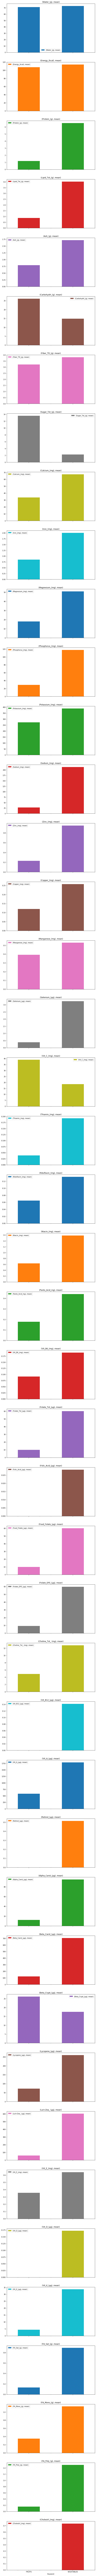

In [31]:
fv = categories_descriptive.loc[['FRUITS', 'VEGETABLES']] #subsetting only two categories, fruits and vegetables
comp = fv.iloc[:, 1::8] #subsetting the mean value of each attribute for both categories
comp
ax = comp.plot.bar(rot=0, figsize = (10,300), subplots=True) #visualizing each attribute of both categories

For the comparison of the next two pairs of categories, the same steps were taken as described above.

#### animal fat vs. vegetable fat

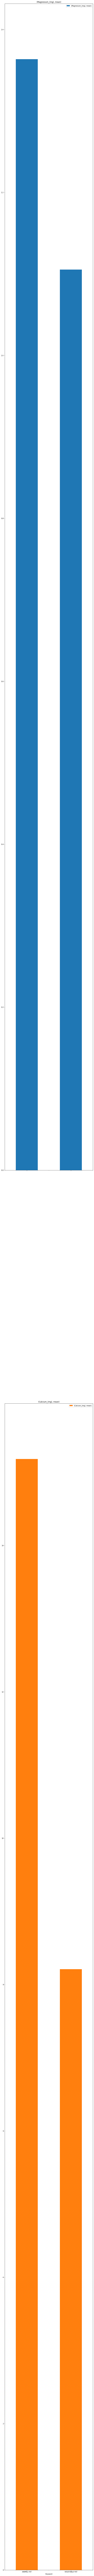

In [32]:
av = new_df.loc[['ANIMAL FAT', 'VEGETABLE FAT']]
av = av.iloc[:, 1::8]
ax = av.plot.bar(rot=0, figsize = (10,300), subplots=True)

#### processed foods vs. vegetables

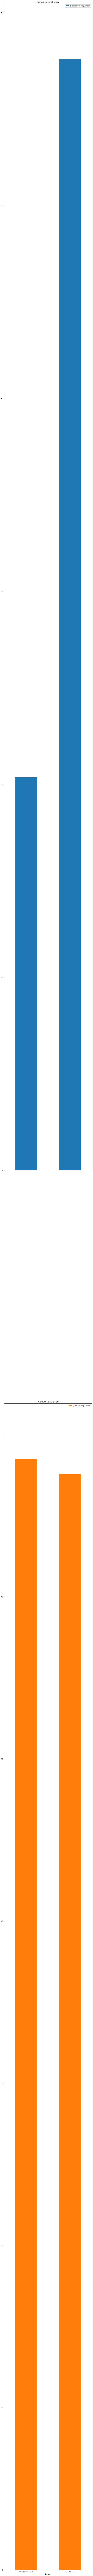

In [33]:
pv = new_df.loc[['PROCESSED FOOD', 'VEGETABLES']]
pv = pv.iloc[:, 1::8]
ax = pv.plot.bar(rot=0, figsize = (10,300), subplots=True)